In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
print("Imported")

Imported


In [90]:
pd.set_option("display.width", 200)
sns.set_theme()

In [3]:
data = pd.read_csv("mx-books.csv",delimiter="|")
data.drop(["Unnamed: 0","Max_prices"], axis = 1).reset_index(drop = True).head()

,time,Rank,Product Names,Stars,Reviews,Authors/Company,Edition/Console,Price_std_or_min
0,2020-07-31 00:38,1.0,El sutil arte de que te importe un carajo: Un ...,4.7,1274.0,Mark Manson,Pasta blanda,188.00
1,2020-07-31 00:38,2.0,El Principito,4.8,1099.0,Antoine De Saint-Exupéry,Pasta dura,47.20
2,2020-07-31 00:38,3.0,Netter Cuaderno de anatomía para colorear,4.9,396.0,PhD John T. Hansen,Pasta blanda,340.00
3,2020-07-31 00:38,4.0,My First Learn to Write Workbook: Practice for...,4.8,1622.0,Crystal Radke,Pasta blanda,140.51
4,2020-07-31 00:38,5.0,De grande quiero ser... feliz: 6 cuentos corto...,4.8,152.0,Anna Morato García,Pasta blanda,169.00


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36200 entries, 0 to 36199
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        36200 non-null  int64  
 1   time              36100 non-null  object 
 2   Rank              36050 non-null  float64
 3   Product Names     35870 non-null  object 
 4   Stars             34766 non-null  float64
 5   Reviews           34766 non-null  float64
 6   Authors/Company   33842 non-null  object 
 7   Edition/Console   35829 non-null  object 
 8   Price_std_or_min  34967 non-null  float64
 9   Max_prices        41 non-null     float64
dtypes: float64(5), int64(1), object(4)
memory usage: 2.8+ MB


In [5]:
data["Product Names"].duplicated().sum()

35857

In [6]:
len(data["Product Names"].unique())

343

In [7]:
data["Product Names"].fillna("no data", inplace = True)
product_count = pd.DataFrame(pd.pivot(
                                data = data, 
                                columns = ["Product Names"], 
                                values = ["Product Names"]).count()
                            ).reset_index()
product_count = product_count.drop("level_0", axis = 1).sort_values(0, ascending=False)
product_count = product_count.rename(columns = {"Product Names":"product names", 0:"sell_frequency"}).reset_index(drop=True)
product_count.head()

,product names,sell_frequency
0,First 100 Words Bilingual: Primeras 100 Palabr...,718
1,De grande quiero ser... feliz: 6 cuentos corto...,718
2,El Principito,718
3,El sutil arte de que te importe un carajo: Un ...,718
4,Toy Story 4 Actividades Colorear,716


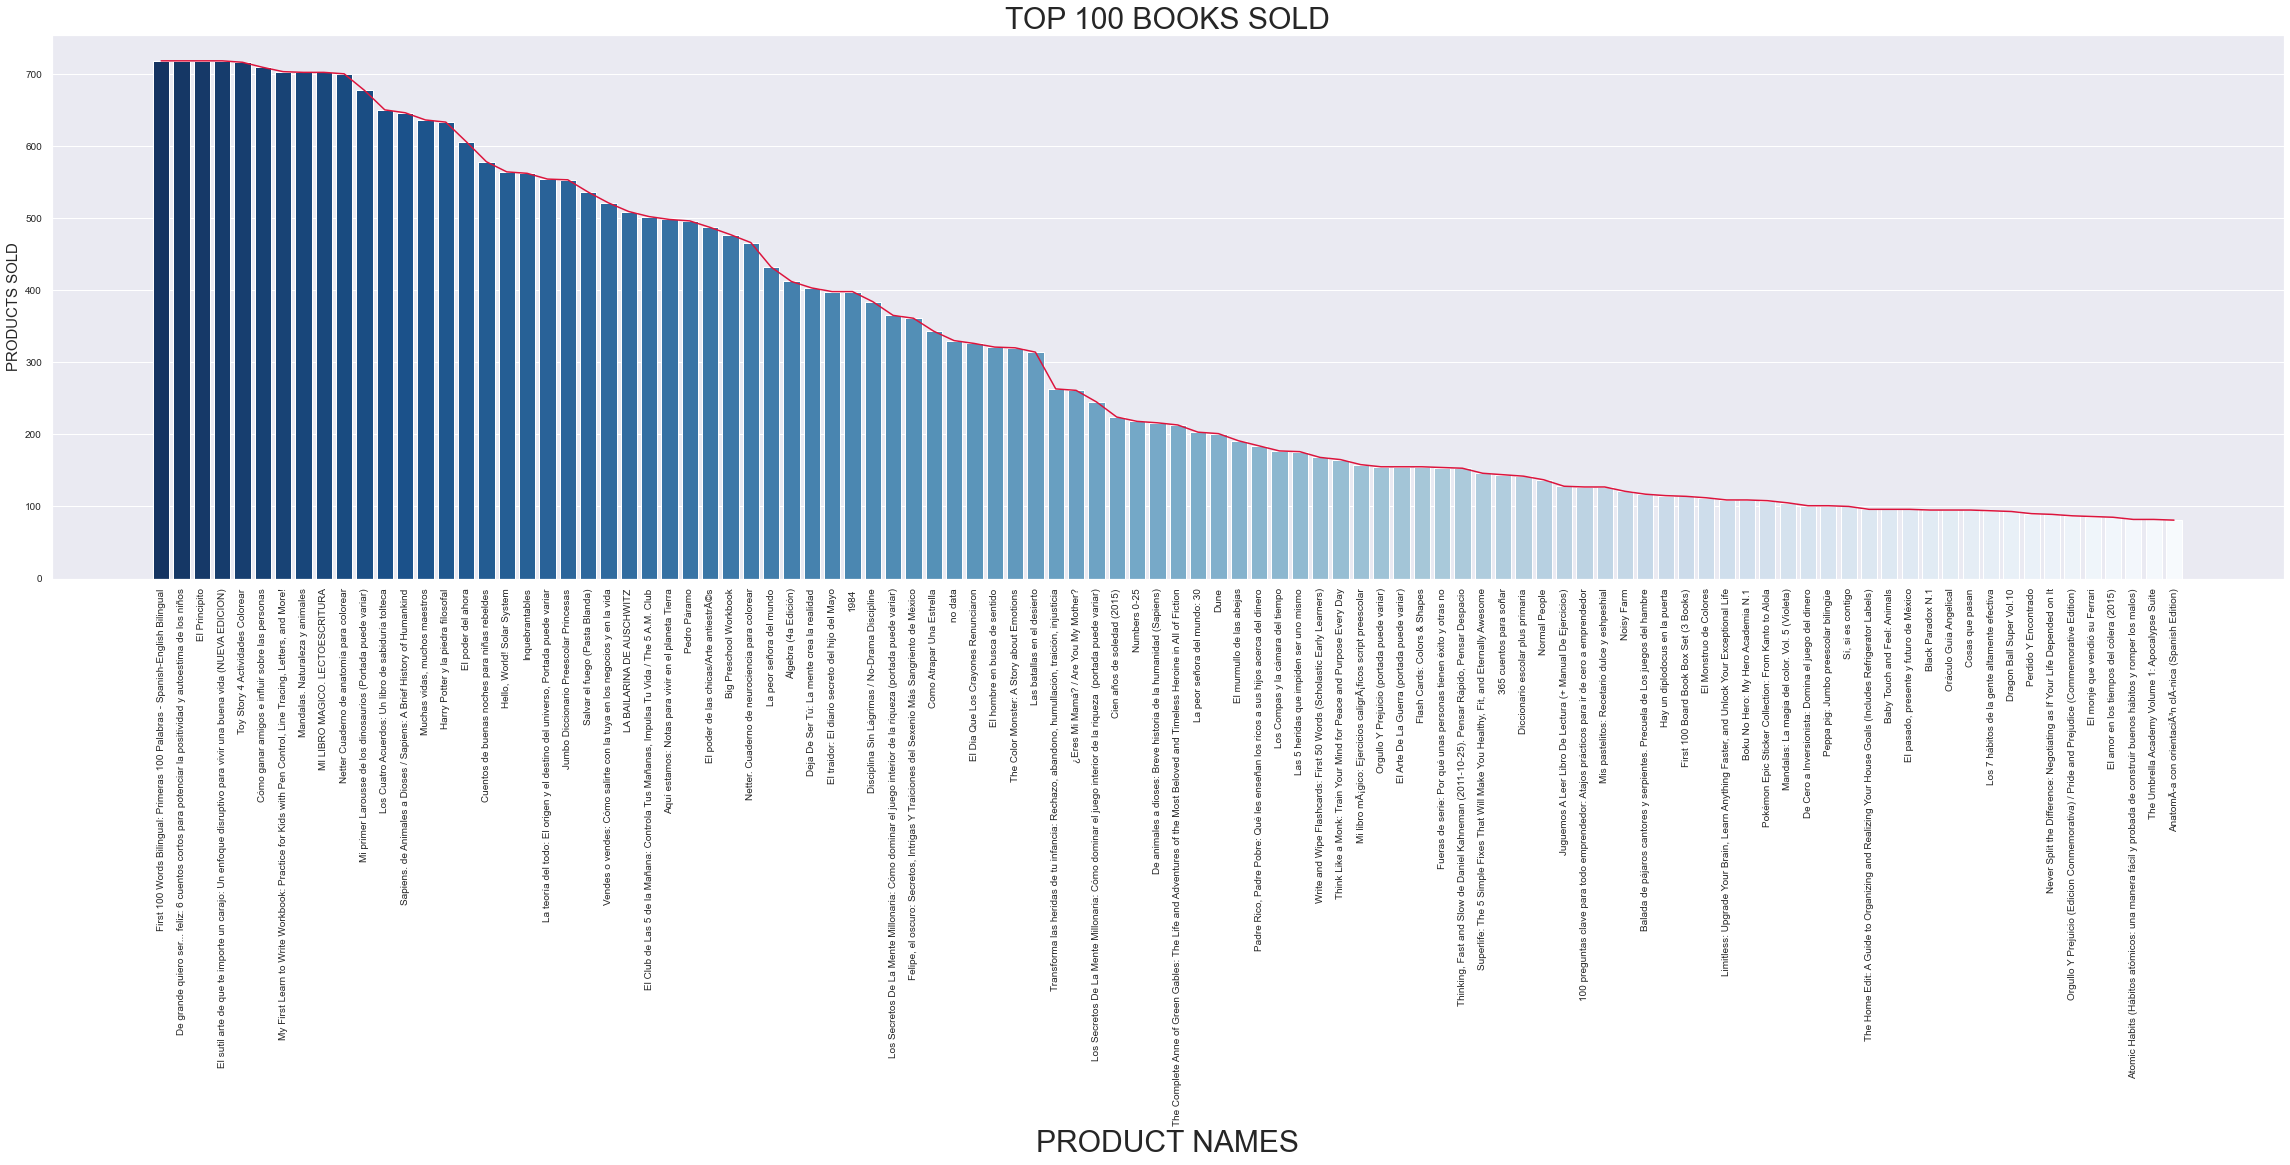

In [152]:
plt.figure(figsize = (40,10))
sns.barplot(
    x = product_count["product names"][:100], 
    y = product_count["sell_frequency"][:100],
    palette = "Blues_r" )
sns.lineplot(
    x = product_count["product names"][:100], 
    y = product_count["sell_frequency"][:100],
    color = "crimson" )
plt.title("TOP 100 BOOKS SOLD", fontsize = 30)
plt.xticks(fontsize = 10, rotation = 90)
plt.yticks(fontsize = 10)
plt.xlabel("PRODUCT NAMES",fontsize = 30)
plt.ylabel("PRODUCTS SOLD",fontsize = 15)
plt.show()

In [9]:
data["Authors/Company"].duplicated().sum()

35941

In [10]:
len(data["Authors/Company"].unique())

259

In [11]:
data["Authors/Company"].fillna("no data", inplace = True)
author_company_count = pd.DataFrame(pd.pivot(
                                data = data, 
                                columns = ["Authors/Company"], 
                                values = ["Authors/Company"]).count()
                            ).reset_index()
author_company_count = author_company_count.drop("level_0", axis = 1).sort_values(0, ascending=False)
author_company_count = author_company_count.rename(columns = {"Authors/Company":"author/company", 0:"sell_frequency"}).reset_index(drop=True)[1:]
author_company_count.head()

,author/company,sell_frequency
1,Roger Priddy,825
2,Oliver Jeffers,824
3,Nueva Imagen,746
4,Antoine De Saint-Exupéry,726
5,Anna Morato García,718


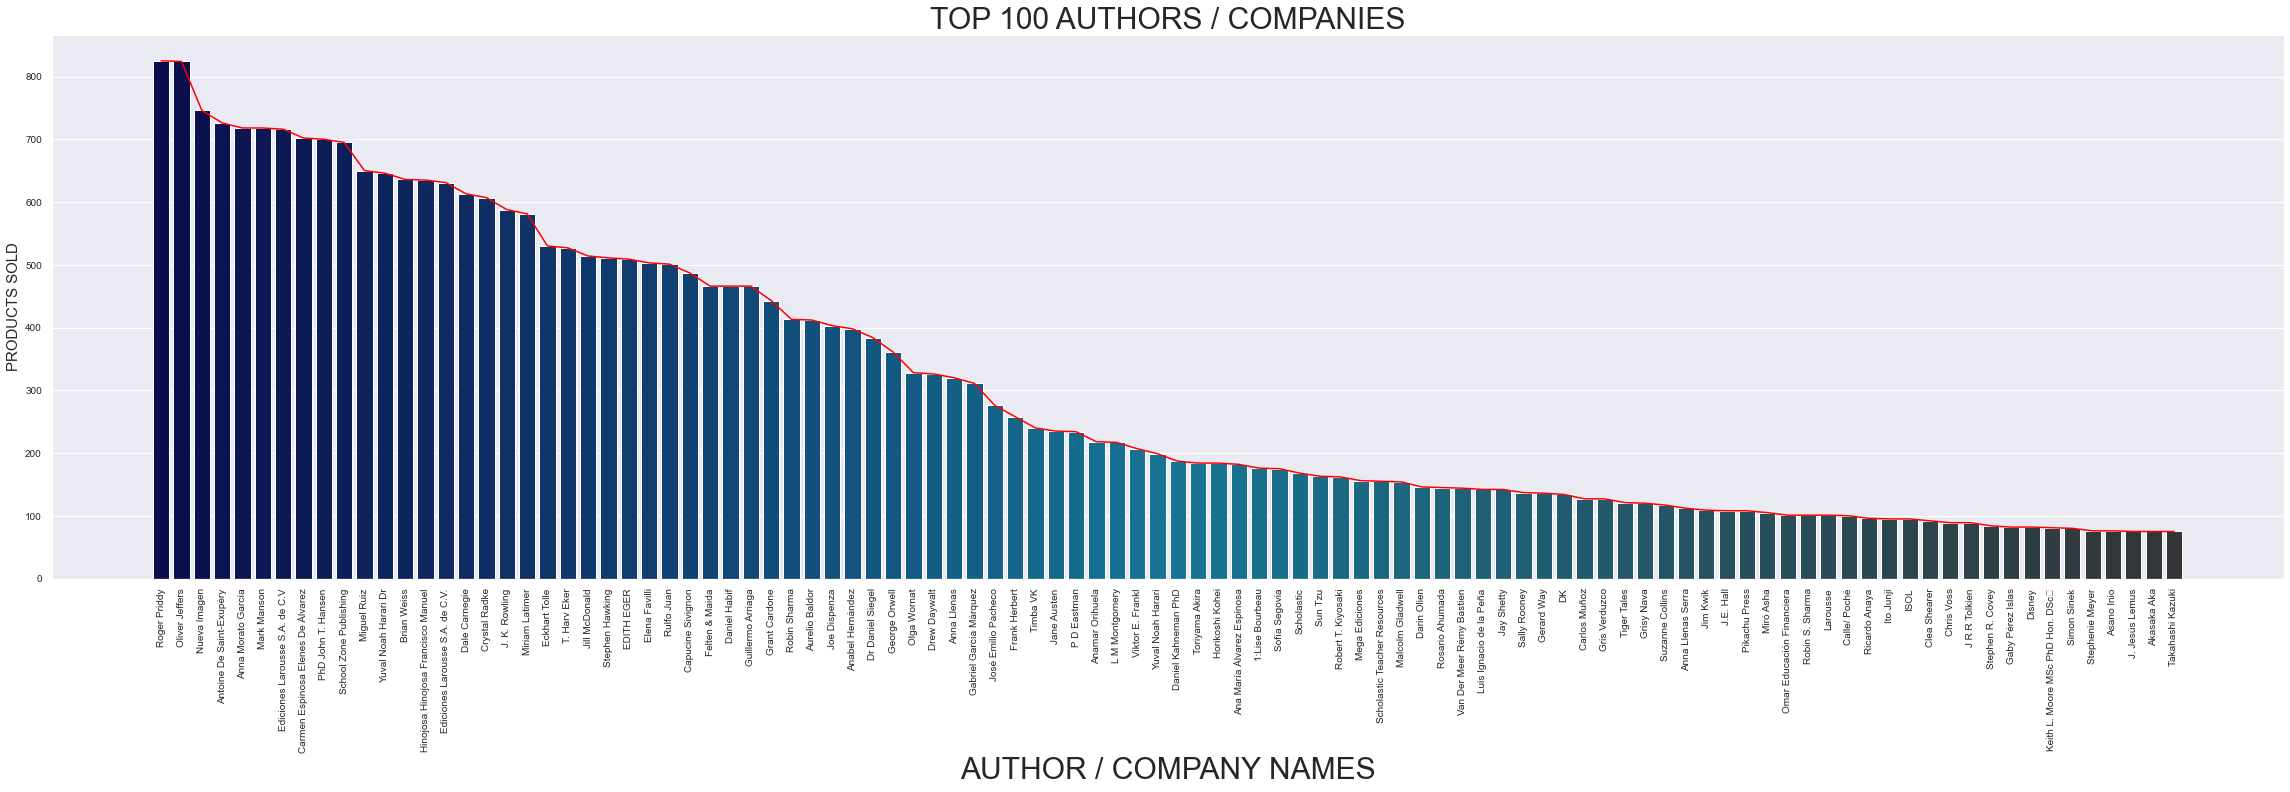

In [62]:
plt.figure(figsize = (40,10))
sns.barplot(
    x = author_company_count["author/company"][:100], 
    y = author_company_count["sell_frequency"][:100],
    palette = "ocean_d" )
sns.lineplot(
    x = author_company_count["author/company"][:100], 
    y = author_company_count["sell_frequency"][:100],
    color = "red" )
plt.title("TOP 100 AUTHORS / COMPANIES", fontsize = 30)
plt.xticks(fontsize = 10, rotation = 90)
plt.yticks(fontsize = 10)
plt.xlabel("AUTHOR / COMPANY NAMES",fontsize = 30)
plt.ylabel("PRODUCTS SOLD",fontsize = 15)
plt.show()

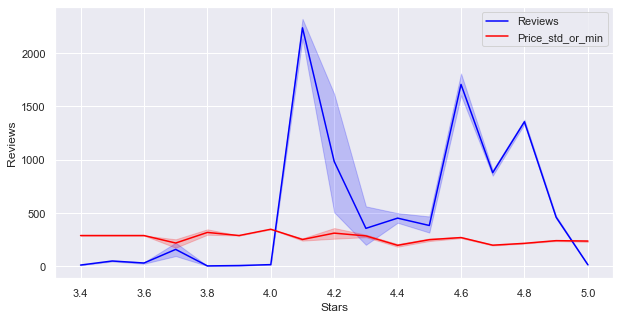

In [153]:
plt.figure(figsize = (10,5))
sns.lineplot(x = data["Stars"], y = data["Reviews"], color = "blue")
sns.lineplot(x = data["Stars"], y = data["Price_std_or_min"], color = "red")
plt.legend(["Reviews","Price_std_or_min"])
plt.show()

In [264]:
data["Edition/Console"].unique()

array(['Pasta blanda', 'Pasta dura', 'Pasta de cartón',
       'Encuadernación de vinil', 'Cartas', nan, 'Espiral',
       'Cubierta de piel', 'Libro de bolsillo', 'Periódico'], dtype=object)

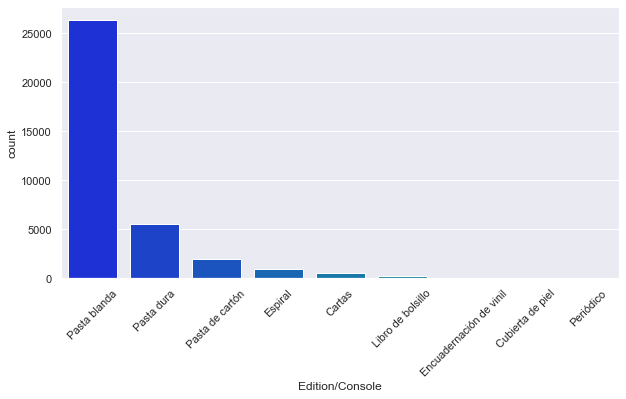

In [15]:
plt.figure(figsize = (10,5))
sns.countplot(
    data["Edition/Console"], 
    order = data["Edition/Console"].value_counts().index,
    palette = "winter")
plt.xticks(rotation = 45)
plt.show()

In [16]:
data["time"] = pd.to_datetime(data["time"])

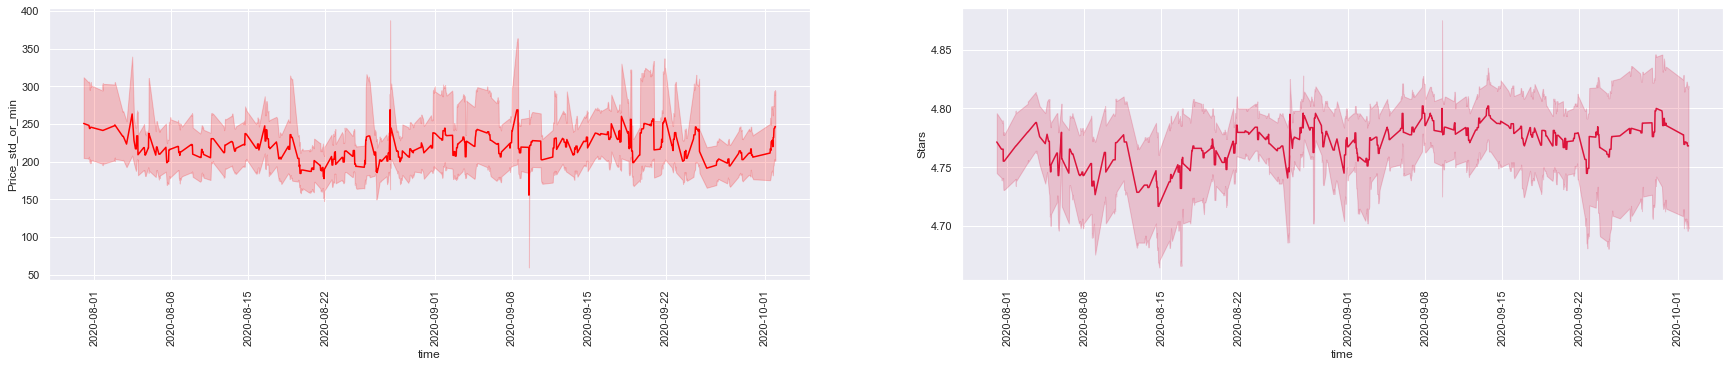

In [32]:
plt.figure(figsize = (30,5))
plt.subplot(1,2,1)
sns.lineplot(x = data["time"], y = data["Price_std_or_min"], color = "red")
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.lineplot(x = data["time"], y = data["Stars"], color = "crimson")
plt.xticks(rotation = 90)
plt.show()

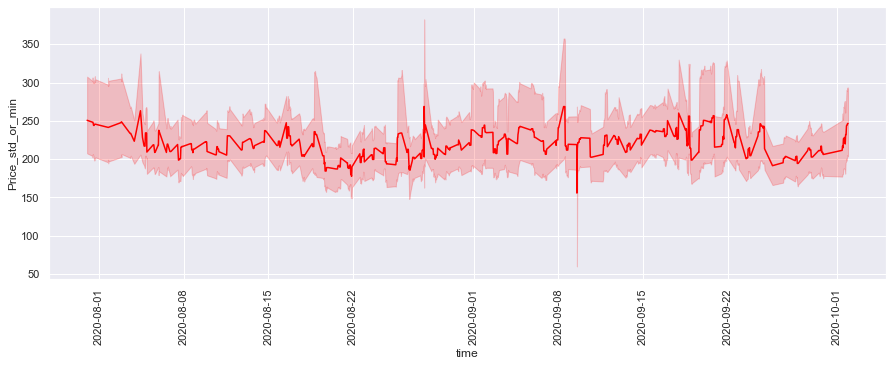

In [33]:
plt.figure(figsize = (15,5))
sns.lineplot(
    x = data["time"], 
    y = data["Price_std_or_min"], 
    color = "red" )
plt.xticks(rotation = 90)
plt.show()

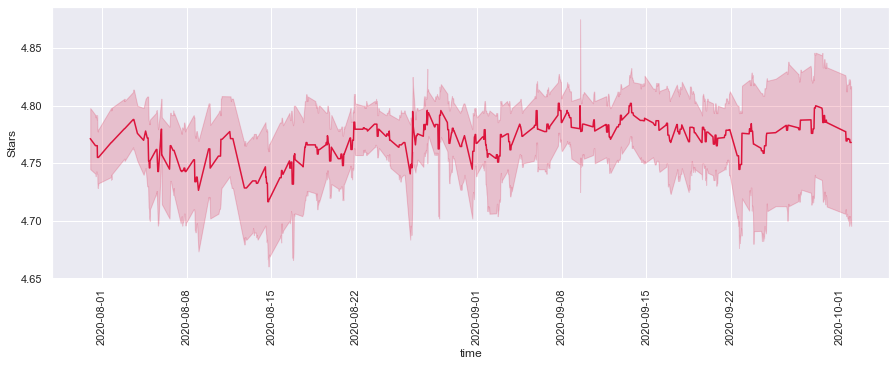

In [34]:
plt.figure(figsize = (15,5))
sns.lineplot(
    x = data["time"], 
    y = data["Stars"], 
    color = "crimson" )
plt.xticks(rotation = 90)
plt.show()

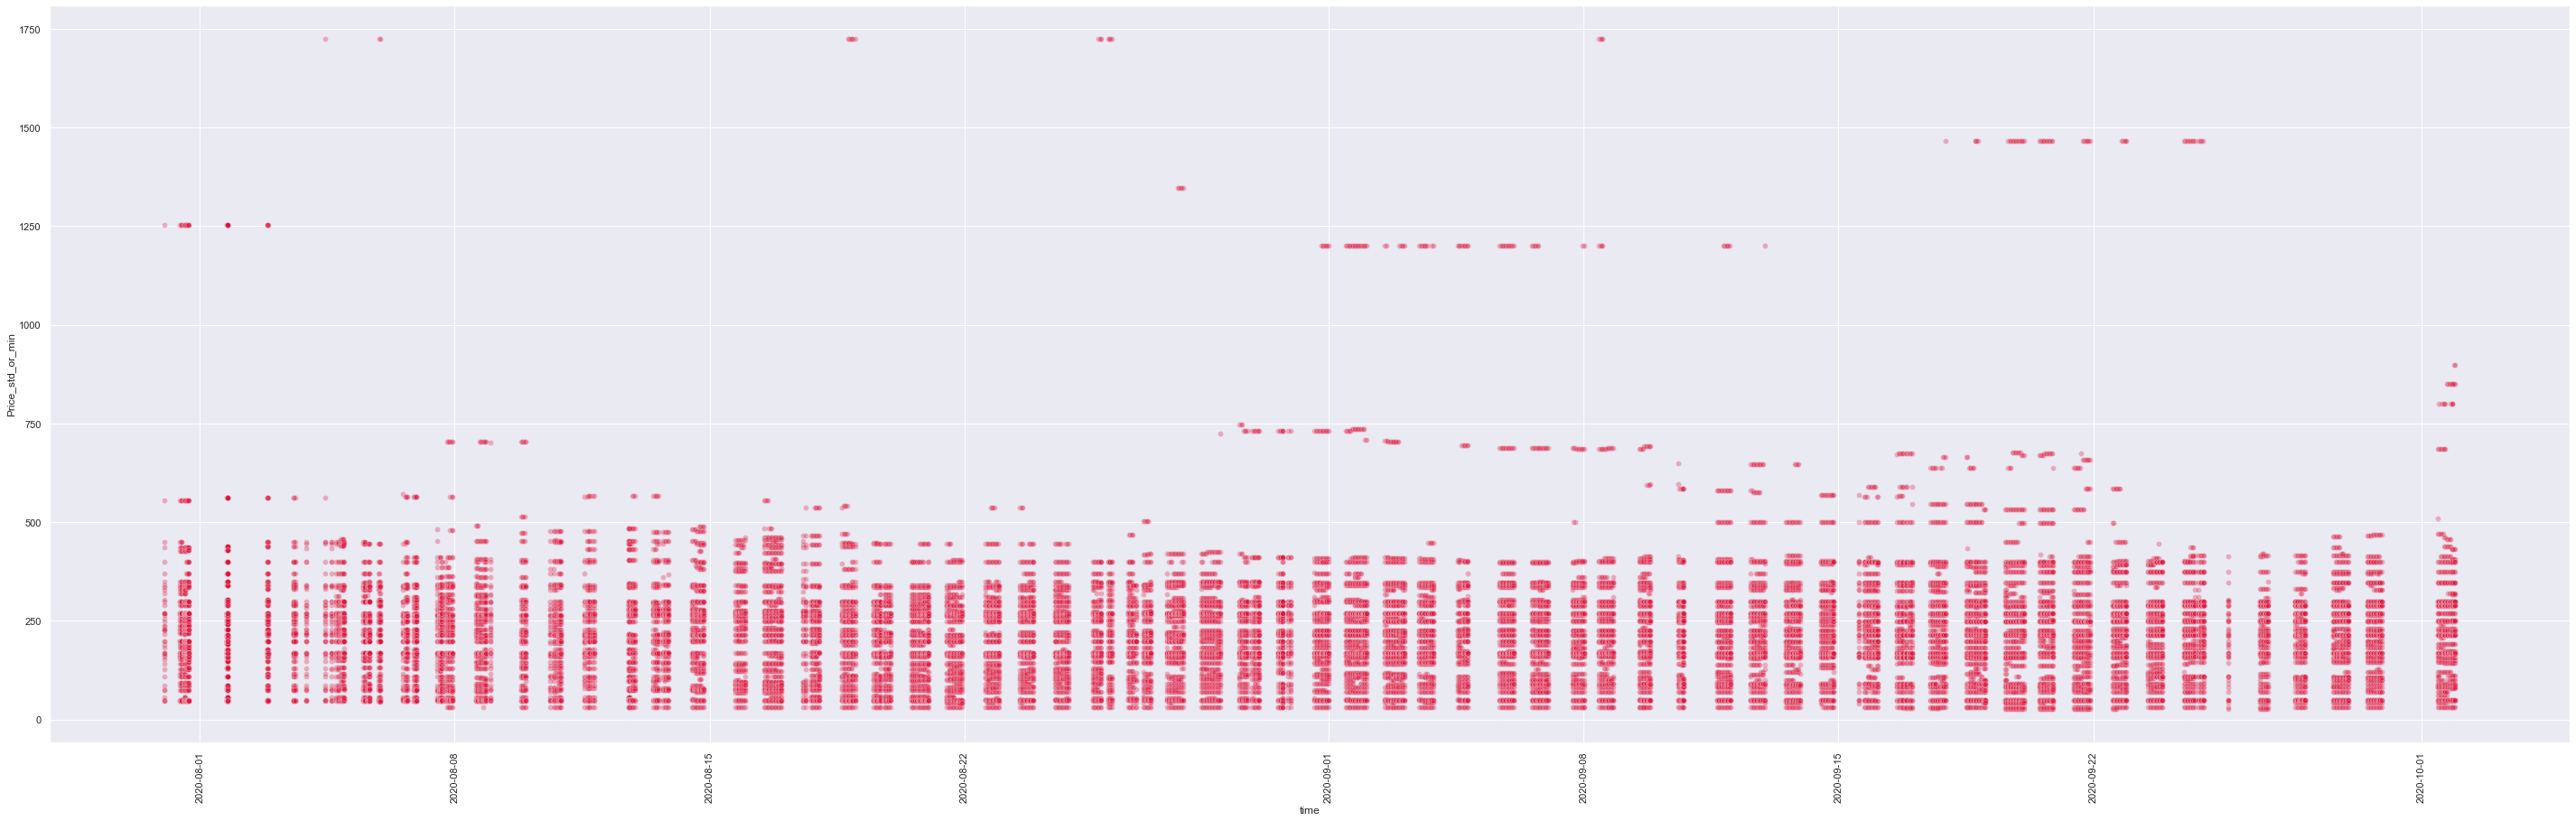

In [162]:
plt.figure(figsize = (50,15))
sns.scatterplot(
    x = data["time"], 
    y = data["Price_std_or_min"], 
    color = "crimson",
    alpha = 0.3)
plt.xticks(rotation = 90)
plt.show()

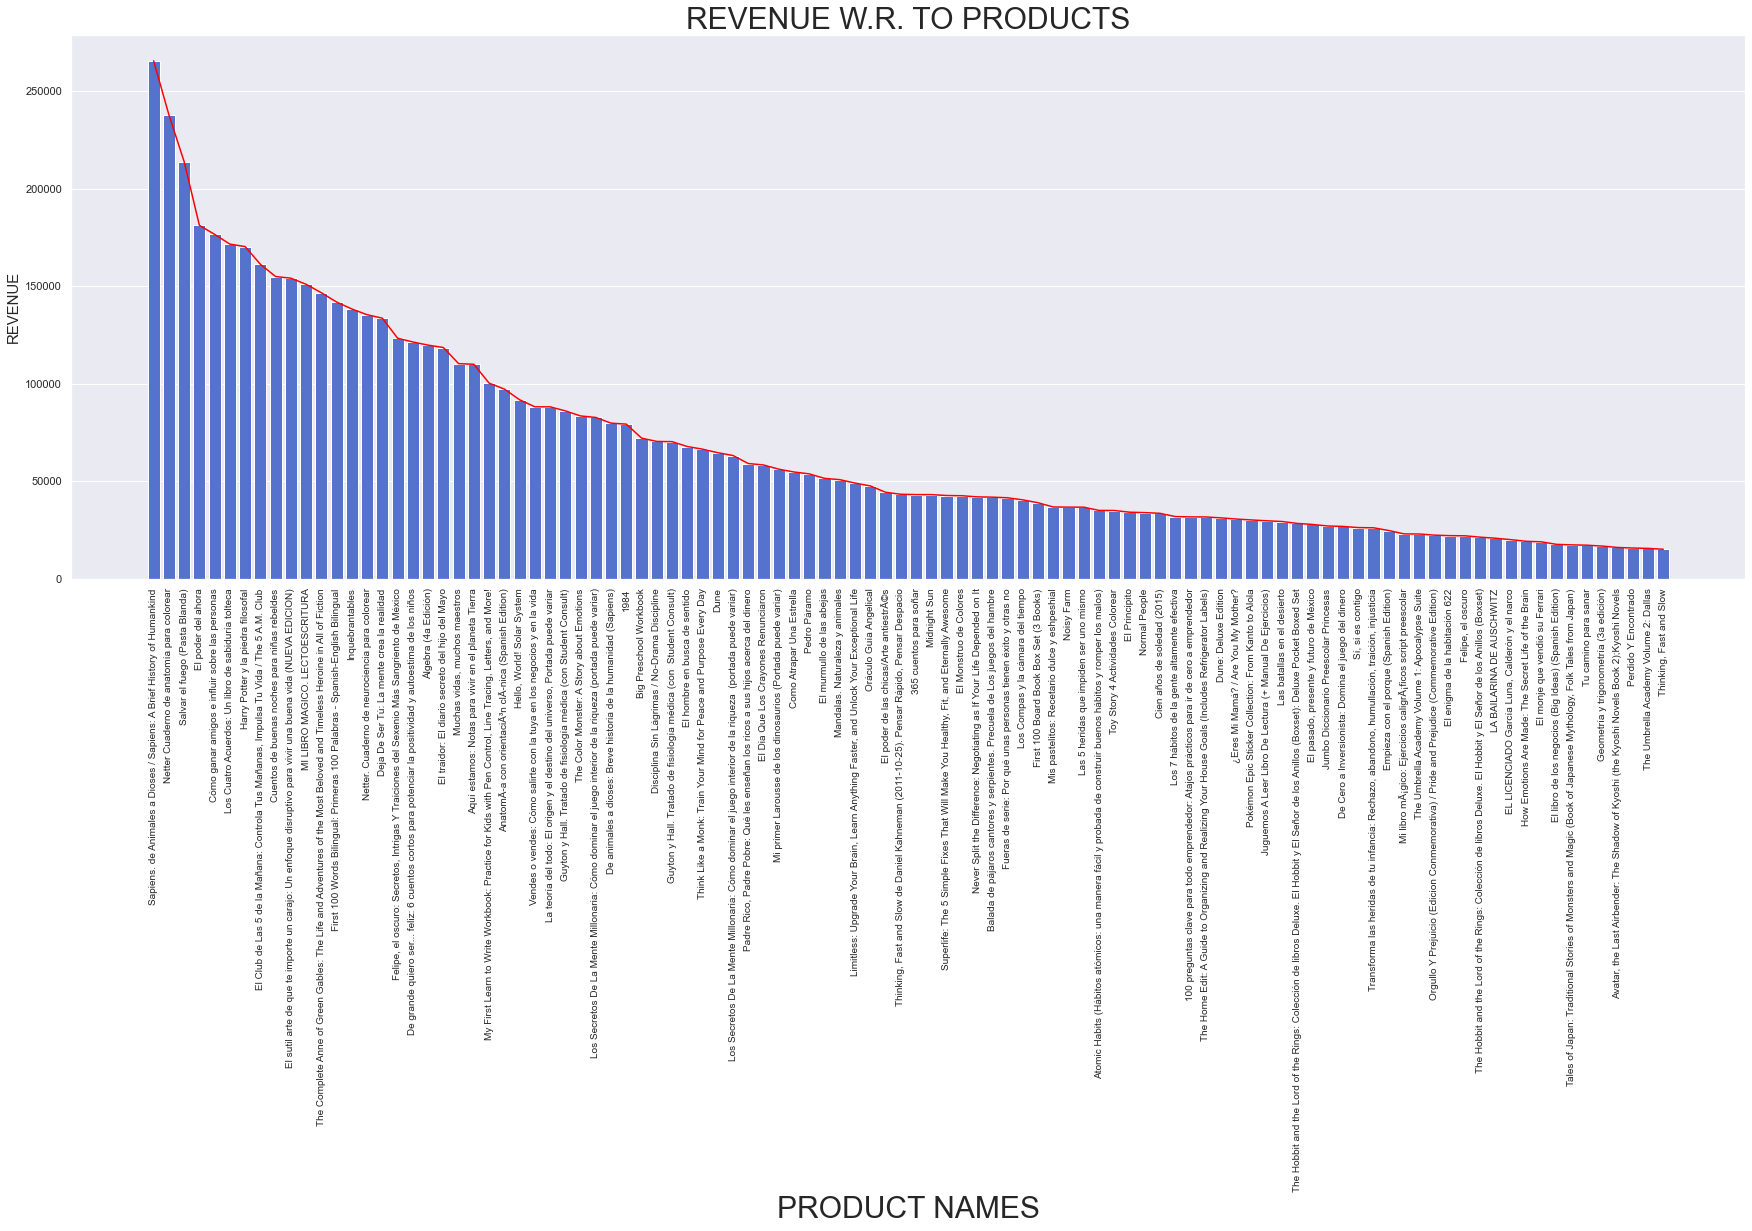

In [76]:
productname_revenue = data.groupby(["Product Names"])[["Price_std_or_min"]].sum().sort_values("Price_std_or_min", ascending = False).reset_index()
plt.figure(figsize = (30,10))
sns.barplot(
    x = productname_revenue["Product Names"][:100], 
    y = productname_revenue["Price_std_or_min"][:100], 
    color = "royalblue" )
sns.lineplot(
    x = productname_revenue["Product Names"][:100], 
    y = productname_revenue["Price_std_or_min"][:100], 
    color = "red" )
plt.title("REVENUE W.R. TO PRODUCTS", fontsize = 30)
plt.xticks(rotation = 90, fontsize = 10)
plt.xlabel("PRODUCT NAMES",fontsize = 30)
plt.ylabel("REVENUE",fontsize = 15)
plt.show()

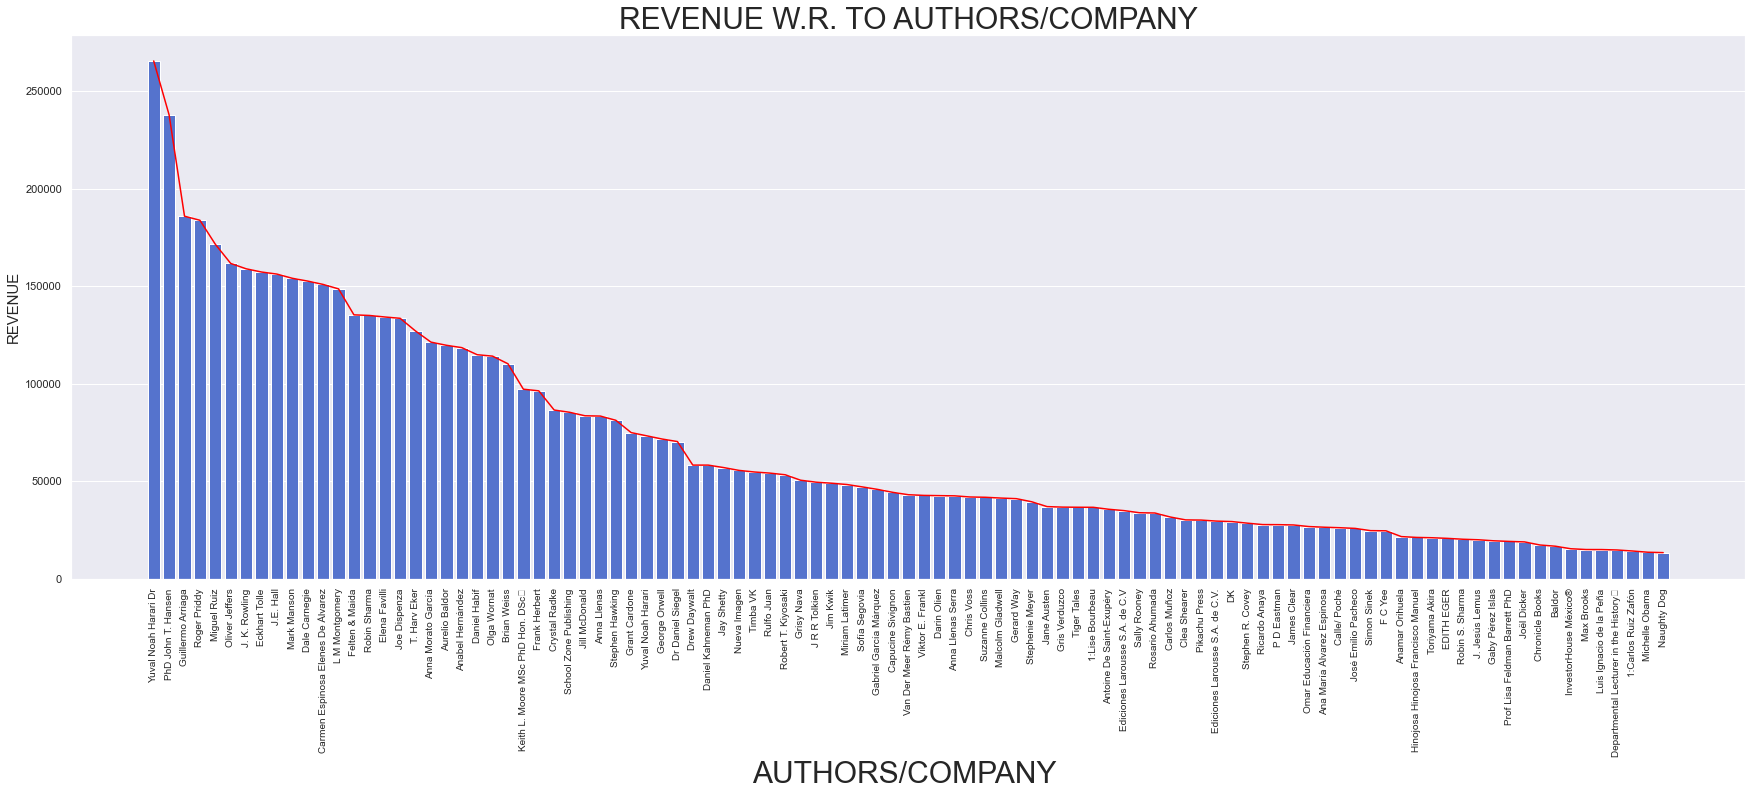

In [150]:
Authors_Company_revenue = data.groupby(["Authors/Company"])[["Price_std_or_min"]].sum().sort_values("Price_std_or_min", ascending = False)[1:100].reset_index()
plt.figure(figsize = (30,10))
sns.barplot(
    x = Authors_Company_revenue["Authors/Company"], 
    y = Authors_Company_revenue["Price_std_or_min"], 
    color = "royalblue" )
sns.lineplot(
    x = Authors_Company_revenue["Authors/Company"], 
    y = Authors_Company_revenue["Price_std_or_min"], 
    color = "red" )
plt.title("REVENUE W.R. TO AUTHORS/COMPANY", fontsize = 30)
plt.xticks(rotation = 90, fontsize = 10)
plt.xlabel("AUTHORS/COMPANY ",fontsize = 30)
plt.ylabel("REVENUE",fontsize = 15)
plt.show()

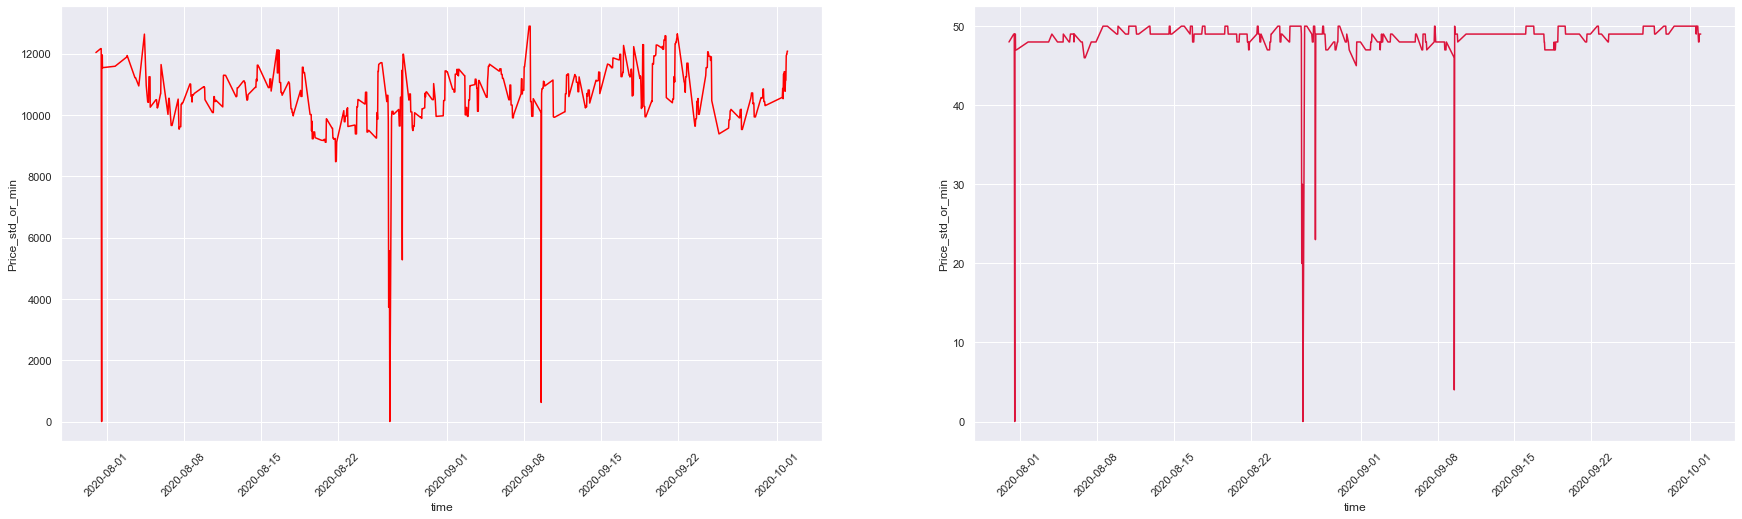

In [130]:
time_revenue = data.groupby(["time"])[["Price_std_or_min"]].sum().reset_index()
time_count = data.groupby(["time"])[["Price_std_or_min"]].count().reset_index()
plt.figure(figsize = (30,8))
plt.subplot(1,2,1)
sns.lineplot(data = time_revenue, x = "time", y = "Price_std_or_min", color = "red")
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.lineplot(data = time_count, x = "time", y = "Price_std_or_min", color = "crimson")
plt.xticks(rotation=45)
plt.show()

In [147]:
edition_console_revenue = data.groupby(["Edition/Console"])[["Price_std_or_min"]].sum().sort_values("Price_std_or_min", ascending = False)[:100].reset_index()
edition_console_count = data.groupby(["Edition/Console"])[["Price_std_or_min"]].count().sort_values("Price_std_or_min", ascending = False)[:100].reset_index()

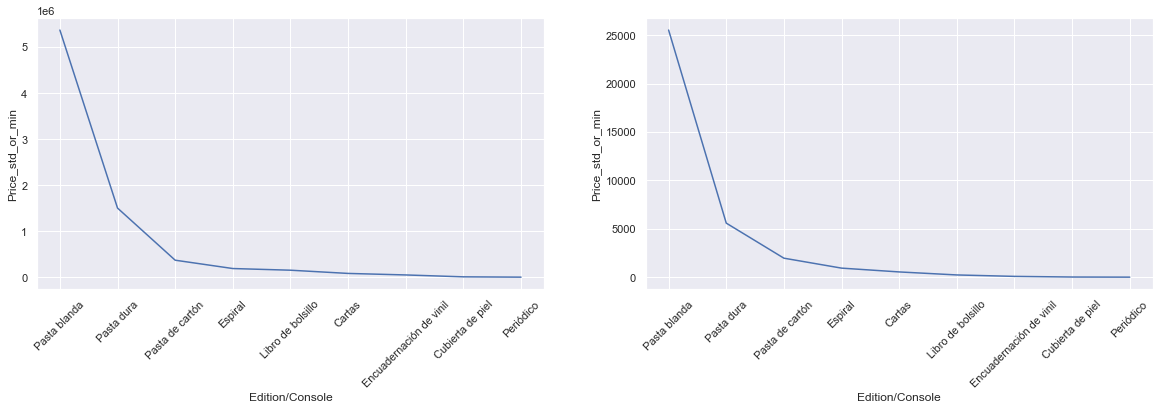

In [148]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.lineplot(data=edition_console_revenue, x = "Edition/Console", y = "Price_std_or_min")
plt.xticks(rotation = 45)
plt.subplot(1,2,2)
sns.lineplot(data=edition_console_count, x = "Edition/Console", y = "Price_std_or_min")
plt.xticks(rotation = 45)
plt.show()

In [151]:
print("SALES :")
print("\nTOP 10 HIGHLY SOLD PRODUCTS : ")
print("\n",product_count.head(10))
print("\n|=========================================================================|")
print("\nTOP 10 HIGHLY SOLD AUTHORS/COMPANY : ")
print("\n",author_company_count.head(10))
print("\n|=========================================================================|")
print("\nTOP 10 HIGHLY SOLD EDITION/CONSOLE: ")
print("\n",edition_console_count.head(10))
print("\n|=========================================================================|")
print("\nREVENUE : \n")
print("TOP 10 HIGH REVENUE PRODUCTS : ")
print("\n",productname_revenue.head(10))
print("\n|=========================================================================|")
print("\nTOP 10 HIGH REVENUE AUTHORS/COMPANY : ")
print("\n",Authors_Company_revenue.head(10))
print("\n|=========================================================================|")
print("\nTOP 10 HIGH REVENUE EDITION/CONSOLE: ")
print("\n",edition_console_revenue.head(10))

SALES :

TOP 10 HIGHLY SOLD PRODUCTS : 

                                        product names  sell_frequency
0  First 100 Words Bilingual: Primeras 100 Palabr...             718
1  De grande quiero ser... feliz: 6 cuentos corto...             718
2                                      El Principito             718
3  El sutil arte de que te importe un carajo: Un ...             718
4                   Toy Story 4 Actividades Colorear             716
5     Cómo ganar amigos e influir sobre las personas             709
6  My First Learn to Write Workbook: Practice for...             703
7                    Mandalas. Naturaleza y animales             702
8                    MI LIBRO MAGICO. LECTOESCRITURA             702
9          Netter Cuaderno de anatomía para colorear             700

|=========================================================================|

TOP 10 HIGHLY SOLD AUTHORS/COMPANY : 

                        author/company  sell_frequency
1                        Ro